# Clustering

In [7]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [8]:
df = pd.read_csv('drivers.csv', delimiter='\t')

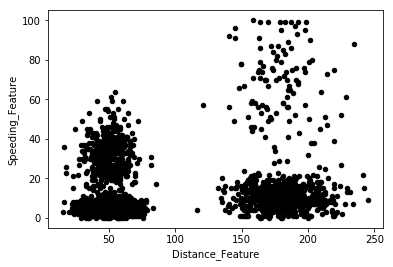

In [13]:
df.plot.scatter(x='Distance_Feature', y='Speeding_Feature', color='black')


In [24]:
kmeans = KMeans(n_clusters=2).fit(df[['Distance_Feature', 'Speeding_Feature']])

In [25]:
kmeans.labels_

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [28]:
df_2_labels = df
df_2_labels['Labels'] = kmeans.labels_
df_2_labels

,Driver_ID,Distance_Feature,Speeding_Feature,Labels
0,3423311935,71.24,28.0,0
1,3423313212,52.53,25.0,0
2,3423313724,64.54,27.0,0
3,3423311373,55.69,22.0,0
4,3423310999,54.58,25.0,0
5,3423313857,41.91,10.0,0
6,3423312432,58.64,20.0,0
7,3423311434,52.02,8.0,0
8,3423311328,31.25,34.0,0
9,3423312488,44.31,19.0,0


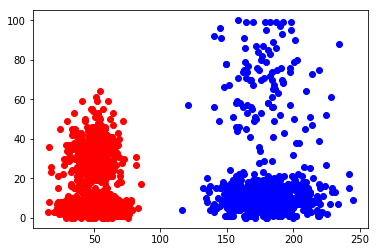

In [29]:
plt.plot(df_2_labels[df_2_labels['Labels'] == 0]['Distance_Feature'], df_2_labels[df_2_labels['Labels'] == 0]['Speeding_Feature'], 'ro')
plt.plot(df_2_labels[df_2_labels['Labels'] == 1]['Distance_Feature'], df_2_labels[df_2_labels['Labels'] == 1]['Speeding_Feature'], 'bo')
plt.show()